In [59]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow, show
%matplotlib inline

## Original Image

In [6]:
picasso_img = Image.open("picasso_weeping_woman.jpg")

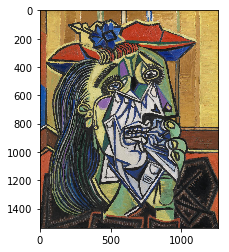

In [7]:
imshow(picasso_img)

In [8]:
picasso_img.mode

'RGB'

In [10]:
picasso_img_array = np.asarray(picasso_img)

In [11]:
picasso_img_array.shape

(1536, 1262, 3)

In [12]:
picasso_img_array

array([[[154, 119,  81],
        [172, 137,  97],
        [179, 141, 102],
        ..., 
        [193, 169, 105],
        [198, 175, 121],
        [162, 137,  96]],

       [[156, 121,  83],
        [162, 127,  89],
        [142, 104,  65],
        ..., 
        [194, 171, 104],
        [197, 175, 118],
        [162, 138,  92]],

       [[167, 132,  94],
        [173, 138, 100],
        [135,  97,  58],
        ..., 
        [206, 184, 111],
        [211, 190, 127],
        [173, 150, 100]],

       ..., 
       [[ 89,  86,  77],
        [ 62,  62,  54],
        [ 74,  74,  66],
        ..., 
        [132, 115,  85],
        [146, 125,  94],
        [161, 135, 108]],

       [[ 91,  88,  79],
        [ 63,  63,  55],
        [ 78,  78,  70],
        ..., 
        [134, 117,  87],
        [156, 135, 104],
        [160, 134, 107]],

       [[ 97,  94,  85],
        [ 47,  47,  39],
        [ 50,  50,  42],
        ..., 
        [128, 111,  81],
        [155, 134, 103],
        [151, 125,

## Gray Image

In [71]:
picasso_img_gray = picasso_img.convert("L")

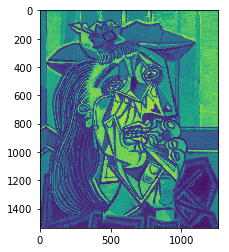

In [42]:
imshow(picasso_img_gray)

In [72]:
picasso_img_gray_array = np.asarray(picasso_img_gray)

In [44]:
picasso_img_gray_array.shape

(1536, 1262)

In [45]:
picasso_img_gray_array

array([[125, 142, 147, ..., 168, 175, 139],
       [127, 133, 110, ..., 170, 175, 139],
       [138, 144, 103, ..., 182, 189, 151],
       ..., 
       [ 85,  61,  73, ..., 116, 127, 139],
       [ 87,  62,  77, ..., 118, 137, 138],
       [ 93,  46,  49, ..., 112, 136, 129]], dtype=uint8)

## Default Binary Image

In [19]:
picasso_img_binary=picasso_img.convert("1")

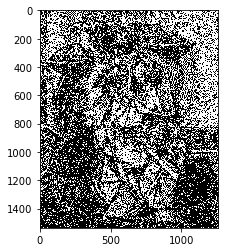

In [20]:
imshow(picasso_img_binary)

In [22]:
picasso_img_binary_array = np.asarray(picasso_img_binary)

In [23]:
picasso_img_binary_array.shape

(1536, 1262)

In [24]:
picasso_img_binary_array

array([[False,  True, False, ..., False,  True, False],
       [ True, False,  True, ...,  True,  True,  True],
       [False,  True, False, ..., False,  True, False],
       ..., 
       [ True, False, False, ...,  True, False,  True],
       [False, False,  True, ...,  True, False,  True],
       [ True, False, False, ..., False,  True, False]], dtype=bool)

In [25]:
picasso_img_gray_array[picasso_img_binary_array==True]

array([142, 144, 124, ...,  58, 108, 136], dtype=uint8)

In [26]:
picasso_img_gray_array[picasso_img_binary_array==False]

array([125, 147, 143, ...,  79, 112, 129], dtype=uint8)

From the PIL documentation: """When converting to a bilevel image (mode "1"), the source image is first converted to black and white. Resulting values larger than 127 are then set to white, and the image is dithered. To use other thresholds, use the point method.""" 

## Custom Binary Image

In [32]:
def get_binary_array(img_array, threshold):
    return img_array > threshold

In [46]:
binary_array_127 = get_binary_array(picasso_img_gray_array, 127)

In [47]:
picasso_img_gray_array

array([[125, 142, 147, ..., 168, 175, 139],
       [127, 133, 110, ..., 170, 175, 139],
       [138, 144, 103, ..., 182, 189, 151],
       ..., 
       [ 85,  61,  73, ..., 116, 127, 139],
       [ 87,  62,  77, ..., 118, 137, 138],
       [ 93,  46,  49, ..., 112, 136, 129]], dtype=uint8)

In [48]:
np.max(picasso_img_gray_array)

252

In [49]:
binary_array_127

array([[False,  True,  True, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]], dtype=bool)

In [77]:
picasso_img_gray_array[binary_array_127==True]

array([142, 147, 144, ..., 134, 136, 129], dtype=uint8)

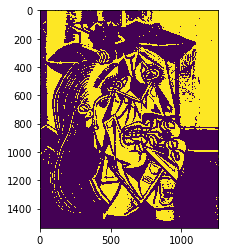

In [50]:
imshow(binary_array_127)

If you compare this with the default binary image, you can see that using custom barrier generates a more clear image without white noise. 

Threshold:1


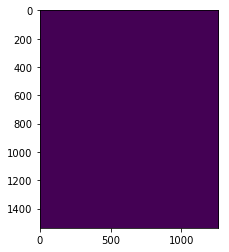

In [73]:
threshold=1
custom_binary_array = get_binary_array(picasso_img_gray_array, threshold)
print("Threshold:{}".format(threshold))
imshow(custom_binary_array)

Threshold:50


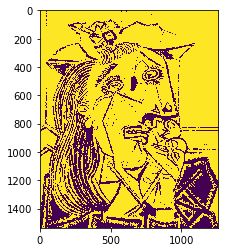

In [57]:
threshold=50
custom_binary_array = get_binary_array(picasso_img_gray_array, threshold)
print("Threshold:{}".format(threshold))
imshow(custom_binary_array)

Threshold:2


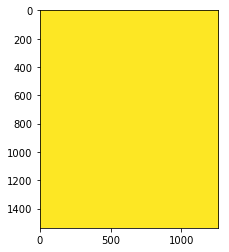

Threshold:30


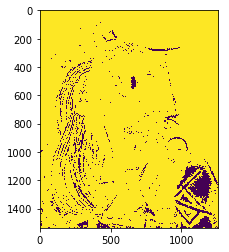

Threshold:58


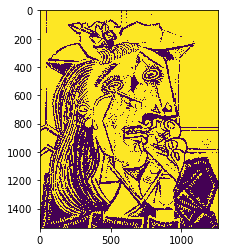

Threshold:86


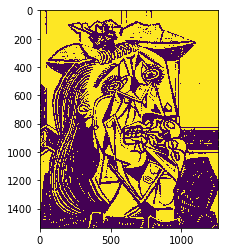

Threshold:114


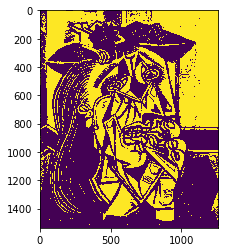

Threshold:142


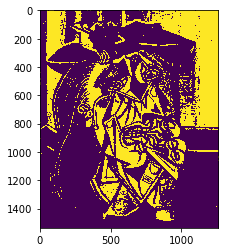

Threshold:170


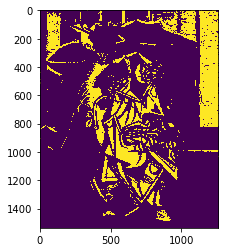

Threshold:198


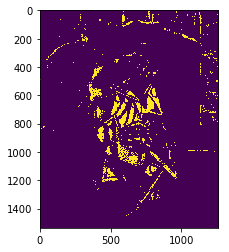

Threshold:226


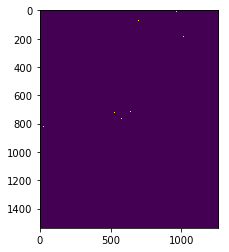

Threshold:254


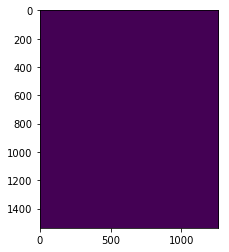

In [76]:
for i in np.linspace(2, 254, 10):
    threshold = int(i)
    custom_binary_array = get_binary_array(picasso_img_gray_array, threshold)
    print("Threshold:{}".format(threshold))
    imshow(custom_binary_array)
    show()